In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
file = '/kaggle/input/fuel-prices/weekly_fuel_prices_from_2005_to_20240419.csv'

df = pd.read_csv(file)
df.head()

,SURVEY_DATE,EURO-SUPER_95
0,1/3/2005,1115.75
1,1/10/2005,1088.00
2,1/17/2005,1088.14
3,1/24/2005,1090.01
4,1/31/2005,1132.11


In [3]:
data = df.filter(['EURO-SUPER_95'])
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

dataset

array([[1115.75],
       [1088.  ],
       [1088.14],
       [1090.01],
       [1132.11],
       [1135.87],
       [1135.88],
       [1136.04],
       [1136.04],
       [1158.78],
       [1185.9 ],
       [1185.98],
       [1187.92],
       [1236.35],
       [1236.35],
       [1234.89],
       [1234.89],
       [1215.38],
       [1201.12],
       [1186.26],
       [1186.26],
       [1197.86],
       [1216.26],
       [1216.44],
       [1231.19],
       [1245.79],
       [1246.15],
       [1247.67],
       [1245.7 ],
       [1246.26],
       [1246.26],
       [1275.6 ],
       [1277.05],
       [1306.89],
       [1329.84],
       [1296.46],
       [1293.42],
       [1335.22],
       [1337.86],
       [1334.07],
       [1295.58],
       [1256.81],
       [1255.08],
       [1245.95],
       [1226.62],
       [1226.19],
       [1207.21],
       [1214.49],
       [1228.03],
       [1217.22],
       [1255.71],
       [1259.7 ],
       [1260.08],
       [1260.32],
       [1258.18],
       [12

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03004701],
       [0.00486415],
       [0.0049912 ],
       [0.0066882 ],
       [0.04489355],
       [0.04830572],
       [0.04831479],
       [0.04845999],
       [0.04845999],
       [0.06909632],
       [0.09370746],
       [0.09378006],
       [0.09554059],
       [0.13949035],
       [0.13949035],
       [0.13816542],
       [0.13816542],
       [0.12046028],
       [0.10751947],
       [0.09403416],
       [0.09403416],
       [0.10456105],
       [0.12125887],
       [0.12142222],
       [0.1348077 ],
       [0.14805706],
       [0.14838376],
       [0.14976314],
       [0.14797539],
       [0.14848358],
       [0.14848358],
       [0.17510935],
       [0.17642521],
       [0.20350473],
       [0.22433163],
       [0.1940396 ],
       [0.19128083],
       [0.22921393],
       [0.23160971],
       [0.22817032],
       [0.19324101],
       [0.15805761],
       [0.15648765],
       [0.14820226],
       [0.13066047],
       [0.13027025],
       [0.11304608],
       [0.119

In [5]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03004701, 0.00486415, 0.0049912 , 0.0066882 , 0.04489355,
       0.04830572, 0.04831479, 0.04845999, 0.04845999, 0.06909632,
       0.09370746, 0.09378006, 0.09554059, 0.13949035, 0.13949035,
       0.13816542, 0.13816542, 0.12046028, 0.10751947, 0.09403416,
       0.09403416, 0.10456105, 0.12125887, 0.12142222, 0.1348077 ,
       0.14805706, 0.14838376, 0.14976314, 0.14797539, 0.14848358,
       0.14848358, 0.17510935, 0.17642521, 0.20350473, 0.22433163,
       0.1940396 , 0.19128083, 0.22921393, 0.23160971, 0.22817032,
       0.19324101, 0.15805761, 0.15648765, 0.14820226, 0.13066047,
       0.13027025, 0.11304608, 0.11965261, 0.13194003, 0.12213006,
       0.15705937, 0.16068025, 0.1610251 , 0.1612429 , 0.15930087,
       0.15906492, 0.1322395 , 0.13042452, 0.15733162, 0.15733162])]
[0.16259505962212095]

[array([0.03004701, 0.00486415, 0.0049912 , 0.0066882 , 0.04489355,
       0.04830572, 0.04831479, 0.04845999, 0.04845999, 0.06909632,
       0.09370746, 0.09378006, 0.09

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-05-21 19:52:29.907026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 19:52:29.907091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 19:52:29.908632: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


861/861 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - loss: 0.0101


In [7]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step


In [8]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

55.22069438901742

/tmp/ipykernel_161/3554475522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


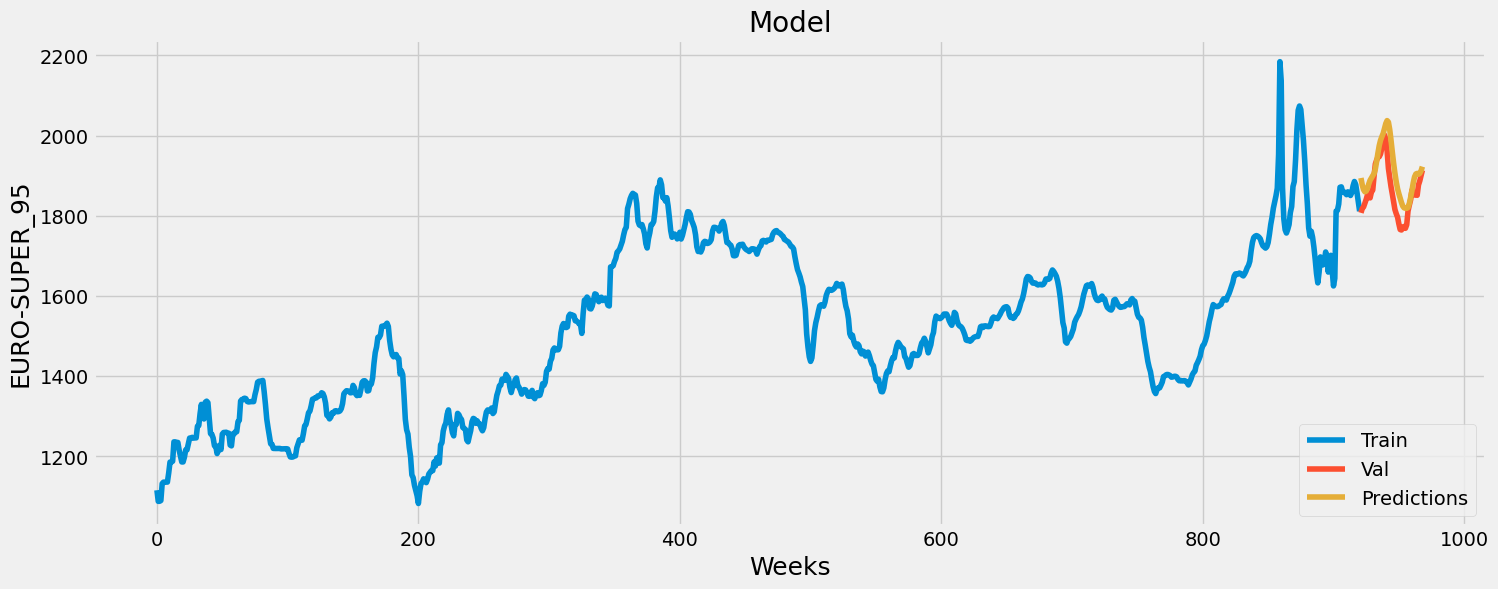

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('EURO-SUPER_95', fontsize=18)
plt.plot(train['EURO-SUPER_95'])
plt.plot(valid[['EURO-SUPER_95', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()